In [9]:
import pandas as pd

co2 = [
    342.76, 343.96, 344.82, 345.82, 347.24, 348.09, 348.66, 347.90, 346.27, 344.21,
    342.88, 342.58, 343.99, 345.31, 345.98, 346.72, 347.63, 349.24, 349.83, 349.10,
    347.52, 345.43, 344.48, 343.89, 345.29, 346.54, 347.66, 348.07, 349.12, 350.55,
    351.34, 350.80, 349.10, 347.54, 346.20, 346.20, 347.44, 348.67]

df = pd.DataFrame({'CO2':co2}, index=pd.date_range('09-21-2002',
                                                   periods=len(co2), freq='W'))


print(df)

               CO2
2002-09-22  342.76
2002-09-29  343.96
2002-10-06  344.82
2002-10-13  345.82
2002-10-20  347.24
2002-10-27  348.09
2002-11-03  348.66
2002-11-10  347.90
2002-11-17  346.27
2002-11-24  344.21
2002-12-01  342.88
2002-12-08  342.58
2002-12-15  343.99
2002-12-22  345.31
2002-12-29  345.98
2003-01-05  346.72
2003-01-12  347.63
2003-01-19  349.24
2003-01-26  349.83
2003-02-02  349.10
2003-02-09  347.52
2003-02-16  345.43
2003-02-23  344.48
2003-03-02  343.89
2003-03-09  345.29
2003-03-16  346.54
2003-03-23  347.66
2003-03-30  348.07
2003-04-06  349.12
2003-04-13  350.55
2003-04-20  351.34
2003-04-27  350.80
2003-05-04  349.10
2003-05-11  347.54
2003-05-18  346.20
2003-05-25  346.20
2003-06-01  347.44
2003-06-08  348.67


/var/folders/wl/bvgg9vxx64scj9r0jxzqssj00000gn/T/ipykernel_53261/2747234448.py:23: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df['Close'].resample('MS',loffset='1D').min().plot( marker='o', label='Monthly Min')
/var/folders/wl/bvgg9vxx64scj9r0jxzqssj00000gn/T/ipykernel_53261/2747234448.py:25: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df['Close'].resample('MS',loffset='1D').max().plot( marker='o', label='Monthly Max')
/var/folders/wl/bvgg9vxx64scj9r0jxzqssj00000gn/T/ipykernel_53261/2747234448.py:27: FutureWarning: 'loffset' in

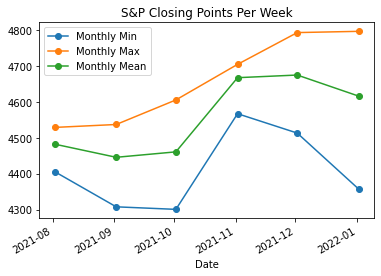

In [12]:
import pandas_datareader  as pdr
import datetime
import pandas             as pd
import matplotlib.pyplot  as plt

# Show all columns.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

def getStock(stk, ttlDays):
    numDays = int(ttlDays)
    dt      = datetime.date.today()
    dtPast  = dt + datetime.timedelta(days=-numDays)
    df      = pdr.get_data_yahoo(stk,
                                 start   = datetime.datetime(dtPast.year, dtPast.month, dtPast.day),
                                 end     = datetime.datetime(dt.year, dt.month, dt.day))
    return df

NUM_DAYS = 160
df       = getStock('^GSPC', NUM_DAYS)

# Show the S&P point min and show it monthly.
df['Close'].resample('MS',loffset='1D').min().plot( marker='o', label='Monthly Min')
# Show the S&P point min and show it monthly.
df['Close'].resample('MS',loffset='1D').max().plot( marker='o', label='Monthly Max')
# Show the S&P point min and show it monthly.
df['Close'].resample('MS',loffset='1D').mean().plot( marker='o', label='Monthly Mean')
plt.title("S&P Closing Points Per Week")
plt.legend(loc='best')
plt.show()

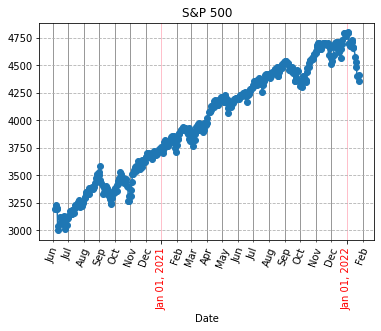

In [25]:
import pandas_datareader  as pdr
import datetime
import pandas             as pd
import matplotlib.pyplot  as plt
import matplotlib.dates   as mdates

# Show all columns.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

def getStock(stk, ttlDays):
    numDays = int(ttlDays)
    dt      = datetime.date.today()
    dtPast  = dt + datetime.timedelta(days=-numDays)
    df      = pdr.get_data_yahoo(stk,
                                 start   = datetime.datetime(dtPast.year, dtPast.month, dtPast.day),
                                 end     = datetime.datetime(dt.year, dt.month, dt.day))
    return df

NUM_DAYS = 600
df      = getStock('^GSPC', NUM_DAYS)

# Get a reference to the subplot.
# Two parameters are needed because subplots() returns
# the figure and axis object together.

# Ax lets us set axis properties.
fig, ax = plt.subplots()

# Plot data with markers at each point.
ax.plot(df.index, df['Close'], marker='o', linestyle='-')

# Set horizontal grid line automatically.
ax.grid(which='major', axis='y', linestyle='--')

# Set vertical major grid.
ax.xaxis.set_major_locator(mdates.YearLocator(day=1))
ax.xaxis.grid(True, which = 'major', linewidth = 1, color = 'pink')

# Set vertical minor grid.
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.grid(True, which = 'minor', linewidth = 1, color = '#999999')

# Set minor ticks.
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=70)

# Set major ticks.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='red')

plt.title("S&P 500")
plt.xlabel("Date")
plt.show()

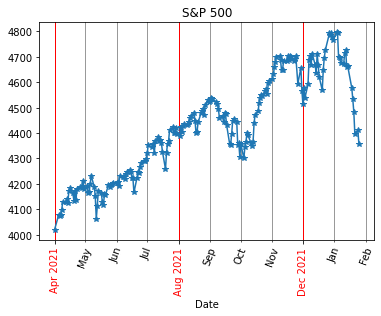

In [29]:
import pandas_datareader  as pdr
import datetime
import pandas             as pd
import matplotlib.pyplot  as plt
import matplotlib.dates   as mdates

# Show all columns.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

def getStock(stk, ttlDays):
    numDays = int(ttlDays)
    dt      = datetime.date.today()
    dtPast  = dt + datetime.timedelta(days=-numDays)
    df      = pdr.get_data_yahoo(stk,
                                 start   = datetime.datetime(dtPast.year, dtPast.month, dtPast.day),
                                 end     = datetime.datetime(dt.year, dt.month, dt.day))
    return df

NUM_DAYS = 300
df      = getStock('^GSPC', NUM_DAYS)

# Get a reference to the subplot.
# Two parameters are needed because subplots() returns
# the figure and axis object together.

# Ax lets us set axis properties.
fig, ax = plt.subplots()

# Plot data with markers at each point.
ax.plot(df.index, df['Close'], marker='*', linestyle='-')

# Set vertical major grid.
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=4))
ax.xaxis.grid(True, which = 'major', linewidth = 1, color = '#ff0000')

# Set vertical minor grid.
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.grid(True, which = 'minor', linewidth = 1, color = '#999999')

# Set minor ticks.
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=70)

# Rotate x-ticks.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='red')

plt.title("S&P 500")
plt.xlabel("Date")
plt.show()

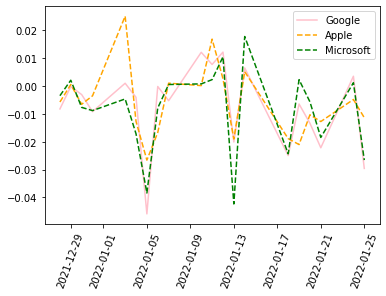

In [31]:
import pandas_datareader  as pdr
import datetime
import pandas             as pd
import matplotlib.pyplot  as plt
import matplotlib.dates   as mdates

# Show all columns.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

def getStock(stk, ttlDays):
    numDays = int(ttlDays)
    dt      = datetime.date.today()
    dtPast  = dt + datetime.timedelta(days=-numDays)
    df      = pdr.get_data_yahoo(stk,
                                 start   = datetime.datetime(dtPast.year, dtPast.month, dtPast.day),
                                 end     = datetime.datetime(dt.year, dt.month, dt.day))
    return df

NUM_DAYS = 30
dfGoogle = getStock('GOOGL', NUM_DAYS)
dfApple  = getStock('AAPL', NUM_DAYS)
dfMsft = getStock('MSFT', NUM_DAYS)

# Get a reference to the subplot.
# Two parameters are needed because subplots() returns
# the figure and axis object together.

# Ax lets us set axis properties.
fig, ax = plt.subplots()

# Plot data with markers at each point.
ax.plot(dfGoogle.index, dfGoogle['Close'].pct_change(), color='pink', label='Google')
ax.plot(dfApple.index, dfApple['Close'].pct_change(), '--', color='orange', label='Apple')
ax.plot(dfMsft.index, dfMsft['Close'].pct_change(), '--', color='green', label='Microsoft')
plt.setp( ax.xaxis.get_majorticklabels(), rotation=70 )
plt.legend(loc="best")
plt.show()

In [33]:
import pandas as pd

co2 = [342.76, 343.96, 344.82, 345.82, 347.24, 348.09, 348.66, 347.90, 346.27]

df = pd.DataFrame({'CO2':co2}, index=pd.date_range('09-01-2020',
                                                   periods=len(co2), freq='B'))
df['CO2_t-1'] = df['CO2'].shift(periods=1)
df['CO2_t-2'] = df['CO2'].shift(periods=2)
df = df.dropna()
print(df)

               CO2  CO2_t-1  CO2_t-2
2020-09-03  344.82   343.96   342.76
2020-09-04  345.82   344.82   343.96
2020-09-07  347.24   345.82   344.82
2020-09-08  348.09   347.24   345.82
2020-09-09  348.66   348.09   347.24
2020-09-10  347.90   348.66   348.09
2020-09-11  346.27   347.90   348.66
